In [1]:
import pandas as pd
import numpy as np

import os
import time
from PIL import Image
import cv2

In [2]:
from IPython.display import Image, display, clear_output, HTML

In [8]:
df = pd.read_csv('RQ1_qualitative.csv')
pd.set_option('display.max_colwidth', None)

# Competence

In [9]:
# df_C will only contain binary competence pt and gt for LLM and RF
df_C = df[["id", "LLM_bin_correct_competence", "LLM_bin_pt_competence", "LLM_bin_gt_competence", "RF_bin_correct_competence", "RF_bin_pt_competence", "RF_bin_gt_competence",]]
df_C.head()

,id,LLM_bin_correct_competence,LLM_bin_pt_competence,LLM_bin_gt_competence,RF_bin_correct_competence,RF_bin_pt_competence,RF_bin_gt_competence
0,/data/llm_social_nav_transformed/1713110825.4897027/npys/1713206071195984429_0.npy,0,0,1,1,1,1
1,/data/llm_social_nav_transformed/1713201977.550016/npys/1713201985503631756_0.npy,1,0,0,0,1,0
2,/data/llm_social_nav_transformed/1713201977.550016/npys/1713202019104172208_0.npy,1,0,0,1,0,0
3,/data/llm_social_nav_transformed/1713203589.8971455/npys/1713202071328087158_0.npy,0,1,0,0,1,0
4,/data/llm_social_nav_transformed/1713203589.8971455/npys/1713203597639578451_0.npy,1,1,1,0,0,1


In [10]:
# Case 1
# Dataframe
df_C_c1 = df_C[df_C["LLM_bin_correct_competence"] > df_C["RF_bin_correct_competence"]]
df_C_c1a = df_C_c1[df_C_c1["LLM_bin_gt_competence"] == 0]  
df_C_c1b = df_C_c1[df_C_c1["LLM_bin_gt_competence"] == 1] 

# List of IDs
id_C_c1 = df_C_c1["id"].to_numpy()
id_C_c1a = df_C_c1a["id"].to_numpy()
id_C_c1b = df_C_c1b["id"].to_numpy()

print(id_C_c1.size, id_C_c1a.size, id_C_c1b.size)

23 15 8


In [11]:
# Case 2
# Dataframe
df_C_c2 = df_C[df_C["LLM_bin_correct_competence"] < df_C["RF_bin_correct_competence"]]
df_C_c2a = df_C_c2[df_C_c2["LLM_bin_gt_competence"] == 0]  
df_C_c2b = df_C_c2[df_C_c2["LLM_bin_gt_competence"] == 1]  

# List of IDs
id_C_c2 = df_C_c2["id"].to_numpy()
id_C_c2a = df_C_c2a["id"].to_numpy()
id_C_c2b = df_C_c2b["id"].to_numpy()

print(id_C_c2.size, id_C_c2a.size, id_C_c2b.size)

19 4 15


In [12]:
# Case 3
# Dataframe
df_C_c3 = df_C[df_C["LLM_bin_correct_competence"] + df_C["RF_bin_correct_competence"] == 0]
df_C_c3a = df_C_c3[df_C_c3["LLM_bin_gt_competence"] == 0]  
df_C_c3b = df_C_c3[df_C_c3["LLM_bin_gt_competence"] == 1] 

# List of IDs
id_C_c3 = df_C_c3["id"].to_numpy()
id_C_c3a = df_C_c3a["id"].to_numpy()
id_C_c3b = df_C_c3b["id"].to_numpy()

print(id_C_c3.size, id_C_c3a.size, id_C_c3b.size)

26 12 14


## Trajectory Analysis

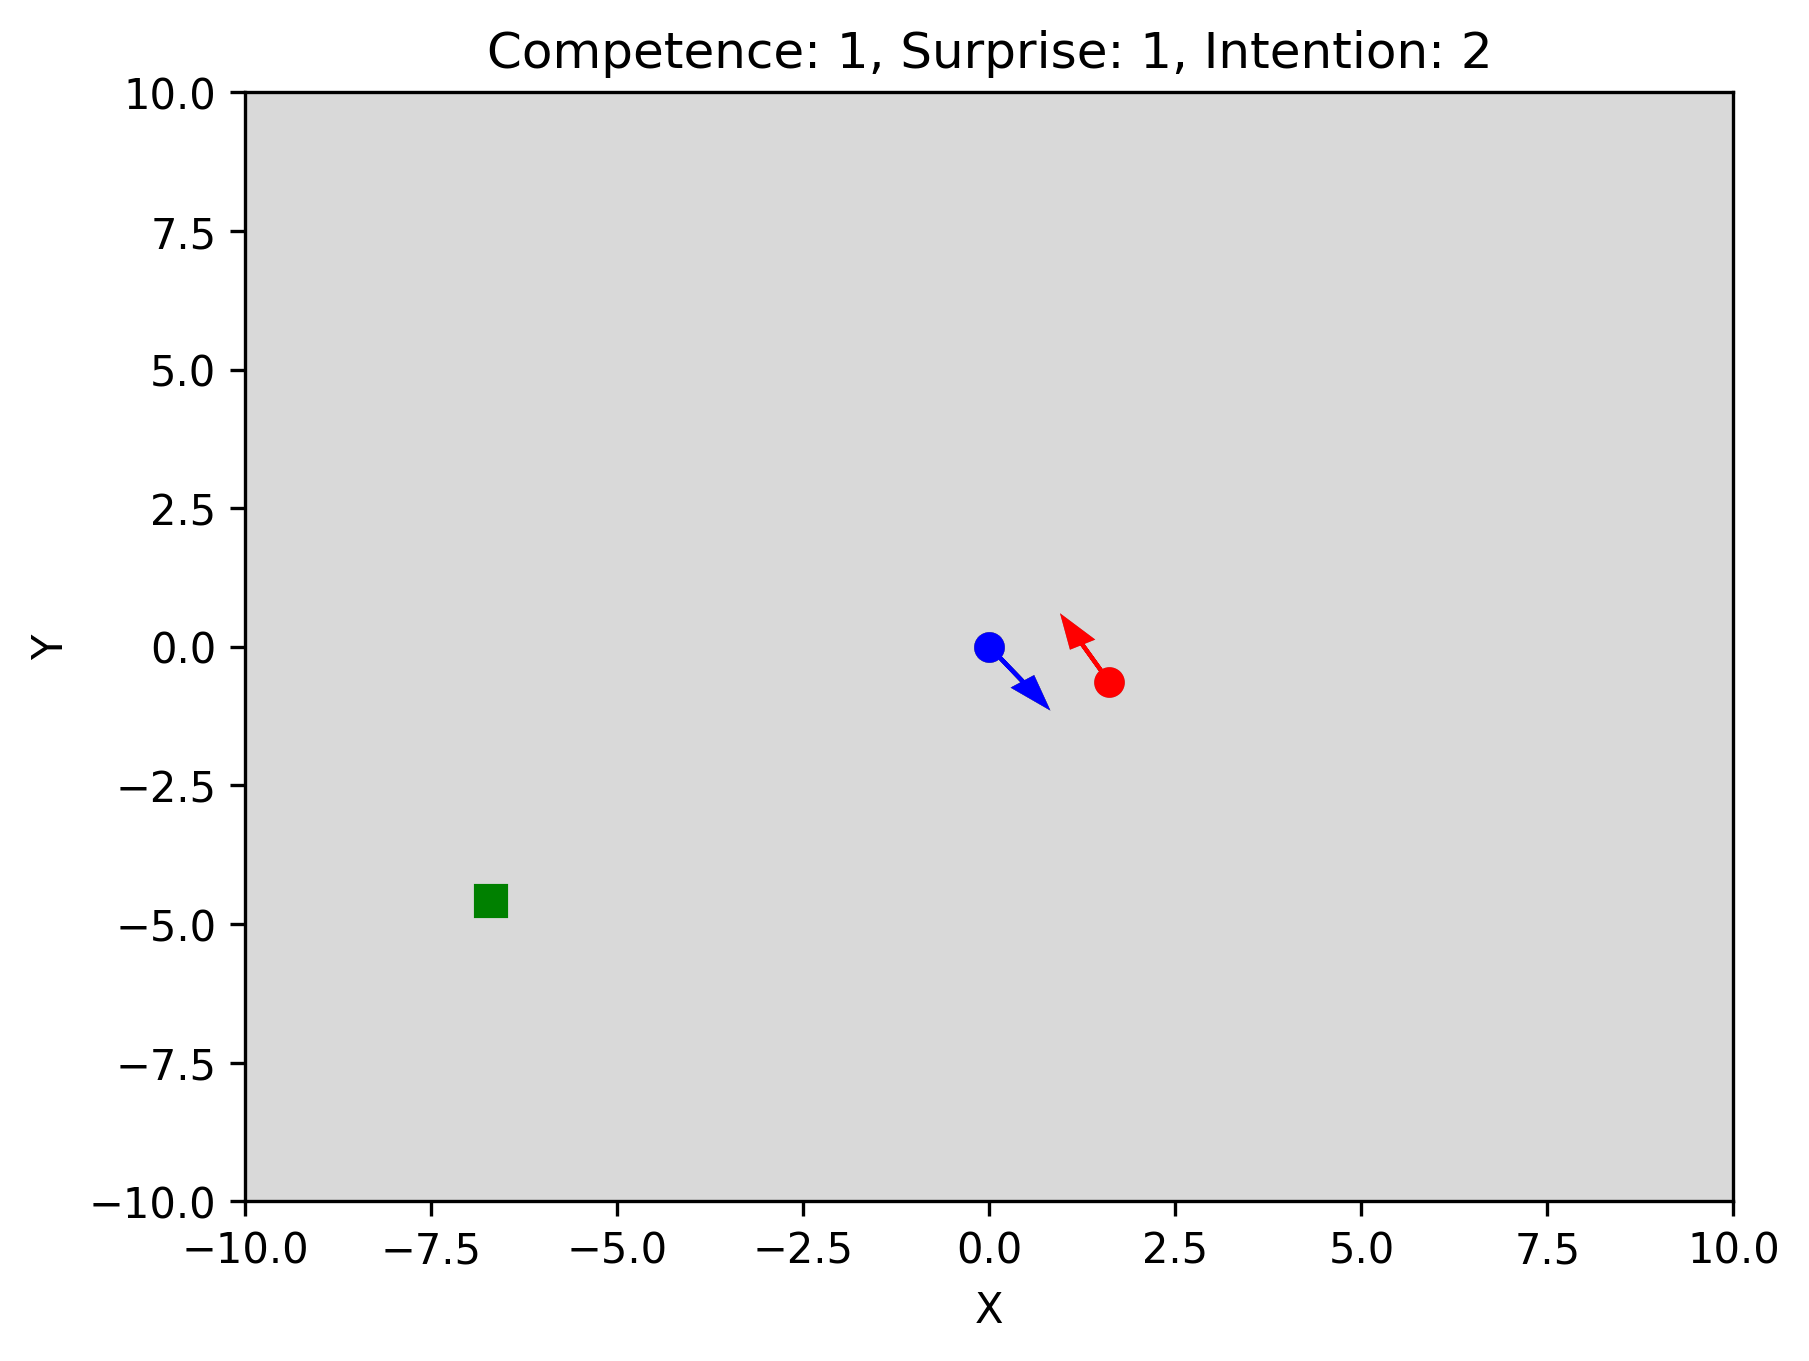

In [13]:
ex = 0
numEx = 15
img_path = str(id_C_c1a[ex])
case = "1a"; # One of 1,2,3,(4) + a/b

###########################################################################################################

# Do not touch the code below !!
img_path_split = img_path.split("/")
participant = img_path_split[3]
bag = img_path_split[5][:-4]

img = 'viz_RQ1/' + participant + '/' + bag + '/spacial_map/spacial_map_'

for i in range(40): 
    clear_output(wait=True)
    display(Image(img+str(i)+".png", width = 600))
    display(HTML(f"<h4 style='text-align: left;'>{'Image: spacial_map_' + str(i)}</h4>"))
    display(HTML(f"<h4 style='text-align: left;'>{'Case ' + case}</h4>"))
    display(HTML(f"<h4 style='text-align: left;'>{'Example ' + str(ex) + ' of ' + str(numEx-1)}</h4>"))
    time.sleep(0.1)

## Surprise

In [14]:
# df_S will only contain binary surprise pt and gt for LLM and RF
df_S = df[["id", "LLM_bin_correct_surprise", "LLM_bin_pt_surprise", "LLM_bin_gt_surprise", "RF_bin_correct_surprise", "RF_bin_pt_surprise", "RF_bin_gt_surprise",]]
df_S.head()

,id,LLM_bin_correct_surprise,LLM_bin_pt_surprise,LLM_bin_gt_surprise,RF_bin_correct_surprise,RF_bin_pt_surprise,RF_bin_gt_surprise
0,/data/llm_social_nav_transformed/1713110825.4897027/npys/1713206071195984429_0.npy,1,0,0,1,0,0
1,/data/llm_social_nav_transformed/1713201977.550016/npys/1713201985503631756_0.npy,0,0,1,0,0,1
2,/data/llm_social_nav_transformed/1713201977.550016/npys/1713202019104172208_0.npy,0,0,1,0,0,1
3,/data/llm_social_nav_transformed/1713203589.8971455/npys/1713202071328087158_0.npy,1,1,1,0,0,1
4,/data/llm_social_nav_transformed/1713203589.8971455/npys/1713203597639578451_0.npy,1,1,1,1,1,1


In [15]:
# Case 1
# Dataframe
df_S_c1 = df_S[df_S["LLM_bin_correct_surprise"] > df_S["RF_bin_correct_surprise"]]
df_S_c1a = df_S_c1[df_S_c1["LLM_bin_gt_surprise"] == 0]  
df_S_c1b = df_S_c1[df_S_c1["LLM_bin_gt_surprise"] == 1] 

# List of IDs
id_S_c1 = df_S_c1["id"].to_numpy()
id_S_c1a = df_S_c1a["id"].to_numpy()
id_S_c1b = df_S_c1b["id"].to_numpy()

print(id_S_c1.size, id_S_c1a.size, id_S_c1b.size)

23 6 17


In [16]:
# Case 2
# Dataframe
df_S_c2 = df_S[df_S["LLM_bin_correct_surprise"] < df_S["RF_bin_correct_surprise"]]
df_S_c2a = df_S_c2[df_S_c2["LLM_bin_gt_surprise"] == 0]  
df_S_c2b = df_S_c2[df_S_c2["LLM_bin_gt_surprise"] == 1]  

# List of IDs
id_S_c2 = df_S_c2["id"].to_numpy()
id_S_c2a = df_S_c2a["id"].to_numpy()
id_S_c2b = df_S_c2b["id"].to_numpy()

print(id_S_c2.size, id_S_c2a.size, id_S_c2b.size)

18 14 4


In [17]:
# Case 3
# Dataframe
df_S_c3 = df_S[df_S["LLM_bin_correct_surprise"] + df_S["RF_bin_correct_surprise"] == 0]
df_S_c3a = df_S_c3[df_S_c3["LLM_bin_gt_surprise"] == 0]  
df_S_c3b = df_S_c3[df_S_c3["LLM_bin_gt_surprise"] == 1] 

# List of IDs
id_S_c3 = df_S_c3["id"].to_numpy()
id_S_c3a = df_S_c3a["id"].to_numpy()
id_S_c3b = df_S_c3b["id"].to_numpy()

print(id_S_c3.size, id_S_c3a.size, id_S_c3b.size)

28 11 17


### Trajectory Analysis

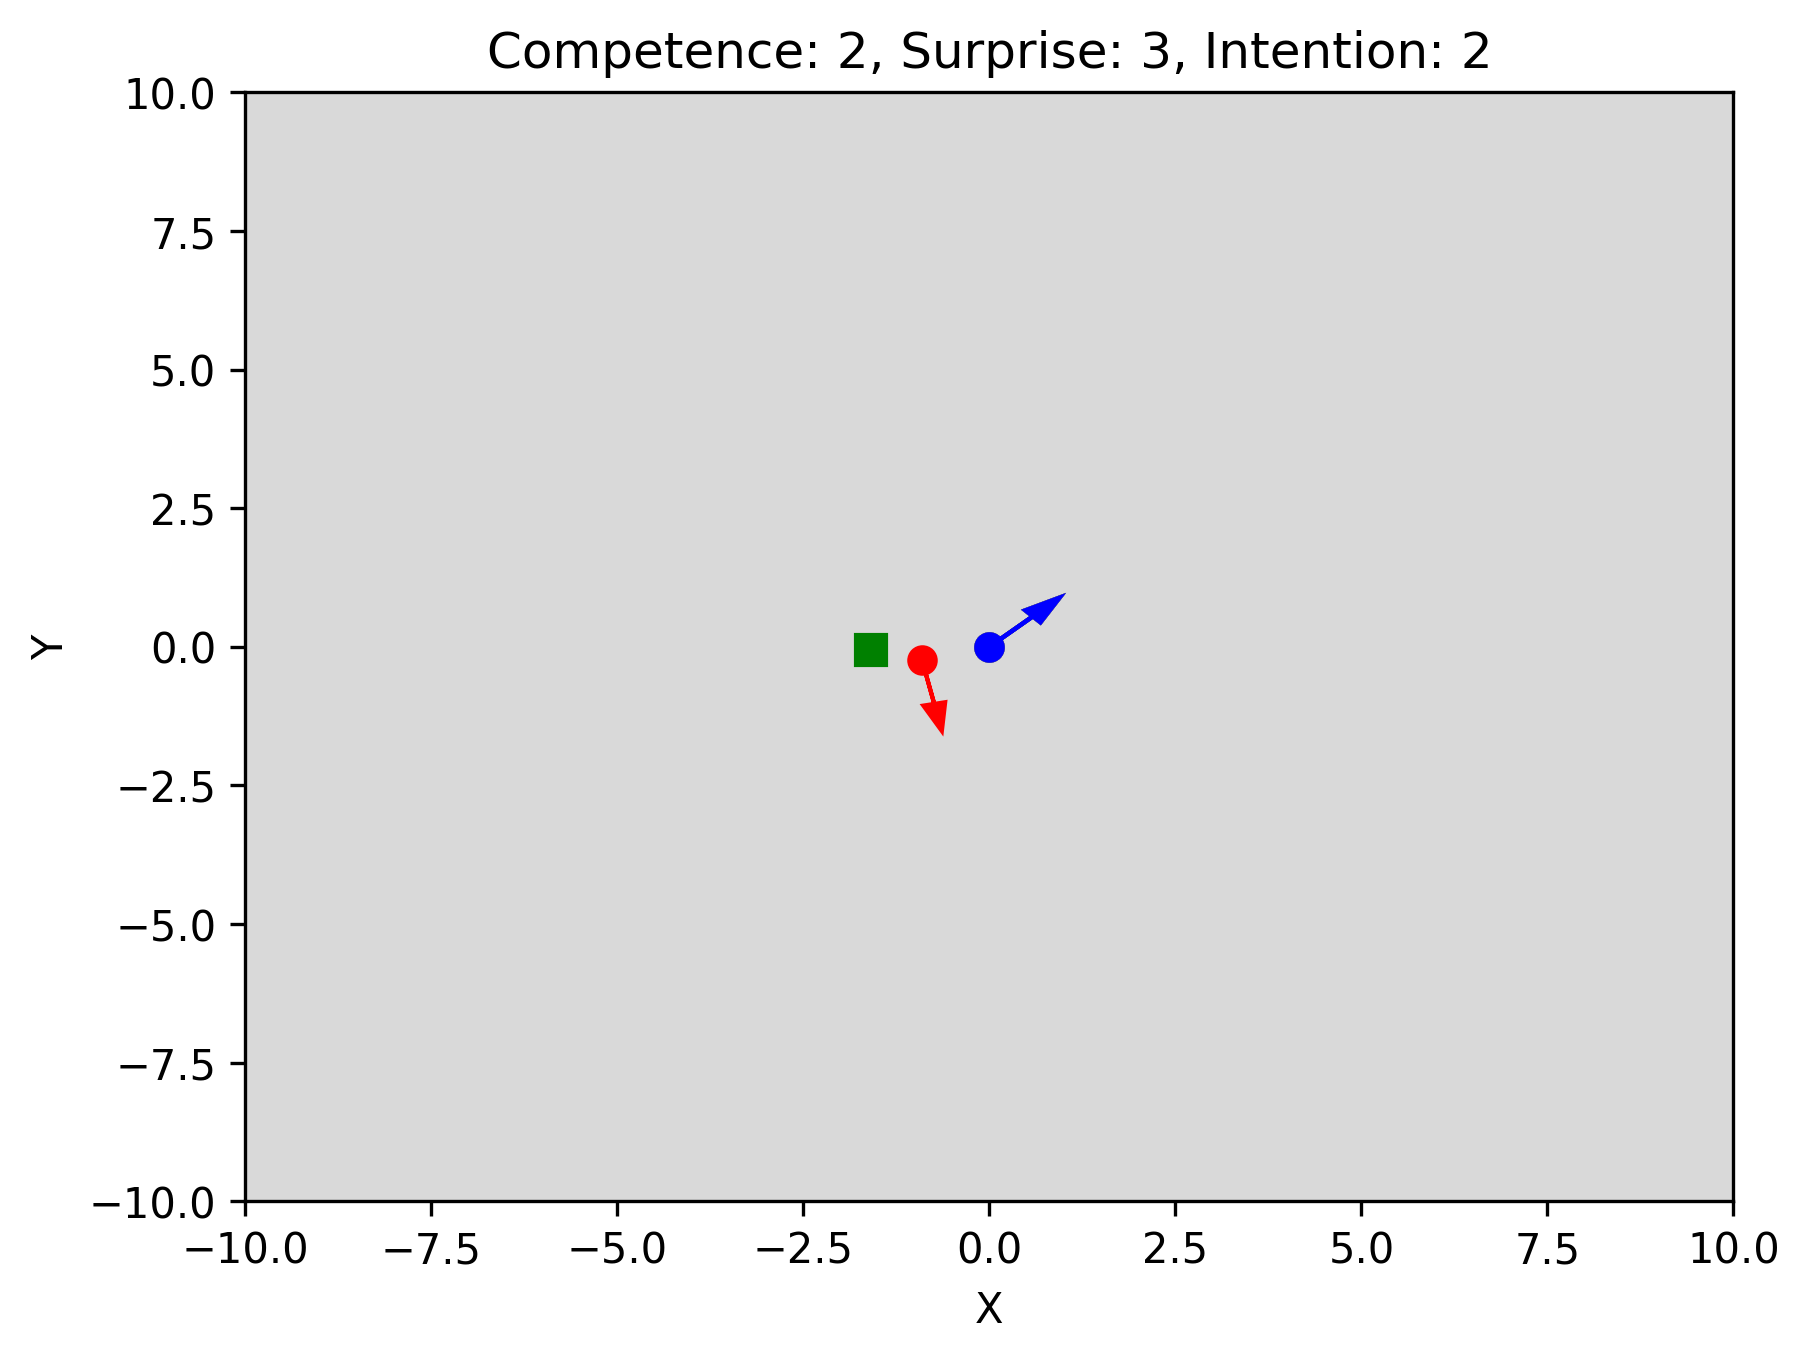

In [19]:
ex = 15
numEx = 17
img_path = str(id_S_c3b[ex])
case = "3b"; # One of 1,2,3,(4) + a/b

###########################################################################################################

# Do not touch the code below !!
img_path_split = img_path.split("/")
participant = img_path_split[3]
bag = img_path_split[5][:-4]

img = 'viz_RQ1/' + participant + '/' + bag + '/spacial_map/spacial_map_'

for i in range(40): 
    clear_output(wait=True)
    display(Image(img+str(i)+".png", width = 600))
    display(HTML(f"<h4 style='text-align: left;'>{'Image: spacial_map_' + str(i)}</h4>"))
    display(HTML(f"<h4 style='text-align: left;'>{'Case ' + case}</h4>"))
    display(HTML(f"<h4 style='text-align: left;'>{'Example ' + str(ex) + ' of ' + str(numEx-1)}</h4>"))
    time.sleep(0.05)

## Intention

In [20]:
# df_I will only contain binary intention pt and gt for LLM and RF
df_I = df[["id", "LLM_bin_correct_intention", "LLM_bin_pt_intention", "LLM_bin_gt_intention", "RF_bin_correct_intention", "RF_bin_pt_intention", "RF_bin_gt_intention",]]
df_I.head()

,id,LLM_bin_correct_intention,LLM_bin_pt_intention,LLM_bin_gt_intention,RF_bin_correct_intention,RF_bin_pt_intention,RF_bin_gt_intention
0,/data/llm_social_nav_transformed/1713110825.4897027/npys/1713206071195984429_0.npy,1,0,0,0,1,0
1,/data/llm_social_nav_transformed/1713201977.550016/npys/1713201985503631756_0.npy,1,0,0,1,0,0
2,/data/llm_social_nav_transformed/1713201977.550016/npys/1713202019104172208_0.npy,1,0,0,1,0,0
3,/data/llm_social_nav_transformed/1713203589.8971455/npys/1713202071328087158_0.npy,0,1,0,0,1,0
4,/data/llm_social_nav_transformed/1713203589.8971455/npys/1713203597639578451_0.npy,0,1,0,1,0,0


In [21]:
# Case 1
# Dataframe
df_I_c1 = df_I[df_I["LLM_bin_correct_intention"] > df_I["RF_bin_correct_intention"]]
df_I_c1a = df_I_c1[df_I_c1["LLM_bin_gt_intention"] == 0]  
df_I_c1b = df_I_c1[df_I_c1["LLM_bin_gt_intention"] == 1] 

# List of IDs
id_I_c1 = df_I_c1["id"].to_numpy()
id_I_c1a = df_I_c1a["id"].to_numpy()
id_I_c1b = df_I_c1b["id"].to_numpy()

print(id_I_c1.size, id_I_c1a.size, id_I_c1b.size)

18 9 9


In [22]:
# Case 2
# Dataframe
df_I_c2 = df_I[df_I["LLM_bin_correct_intention"] < df_I["RF_bin_correct_intention"]]
df_I_c2a = df_I_c2[df_I_c2["LLM_bin_gt_intention"] == 0]  
df_I_c2b = df_I_c2[df_I_c2["LLM_bin_gt_intention"] == 1]  

# List of IDs
id_I_c2 = df_I_c2["id"].to_numpy()
id_I_c2a = df_I_c2a["id"].to_numpy()
id_I_c2b = df_I_c2b["id"].to_numpy()

print(id_I_c2.size, id_I_c2a.size, id_I_c2b.size)

14 11 3


In [23]:
# Case 3
# Dataframe
df_I_c3 = df_I[df_I["LLM_bin_correct_intention"] + df_I["RF_bin_correct_intention"] == 0]
df_I_c3a = df_I_c3[df_I_c3["LLM_bin_gt_intention"] == 0]  
df_I_c3b = df_I_c3[df_I_c3["LLM_bin_gt_intention"] == 1] 

# List of IDs
id_I_c3 = df_I_c3["id"].to_numpy()
id_I_c3a = df_I_c3a["id"].to_numpy()
id_I_c3b = df_I_c3b["id"].to_numpy()

print(id_I_c3.size, id_I_c3a.size, id_I_c3b.size)

30 9 21


### Trajectory Analysis

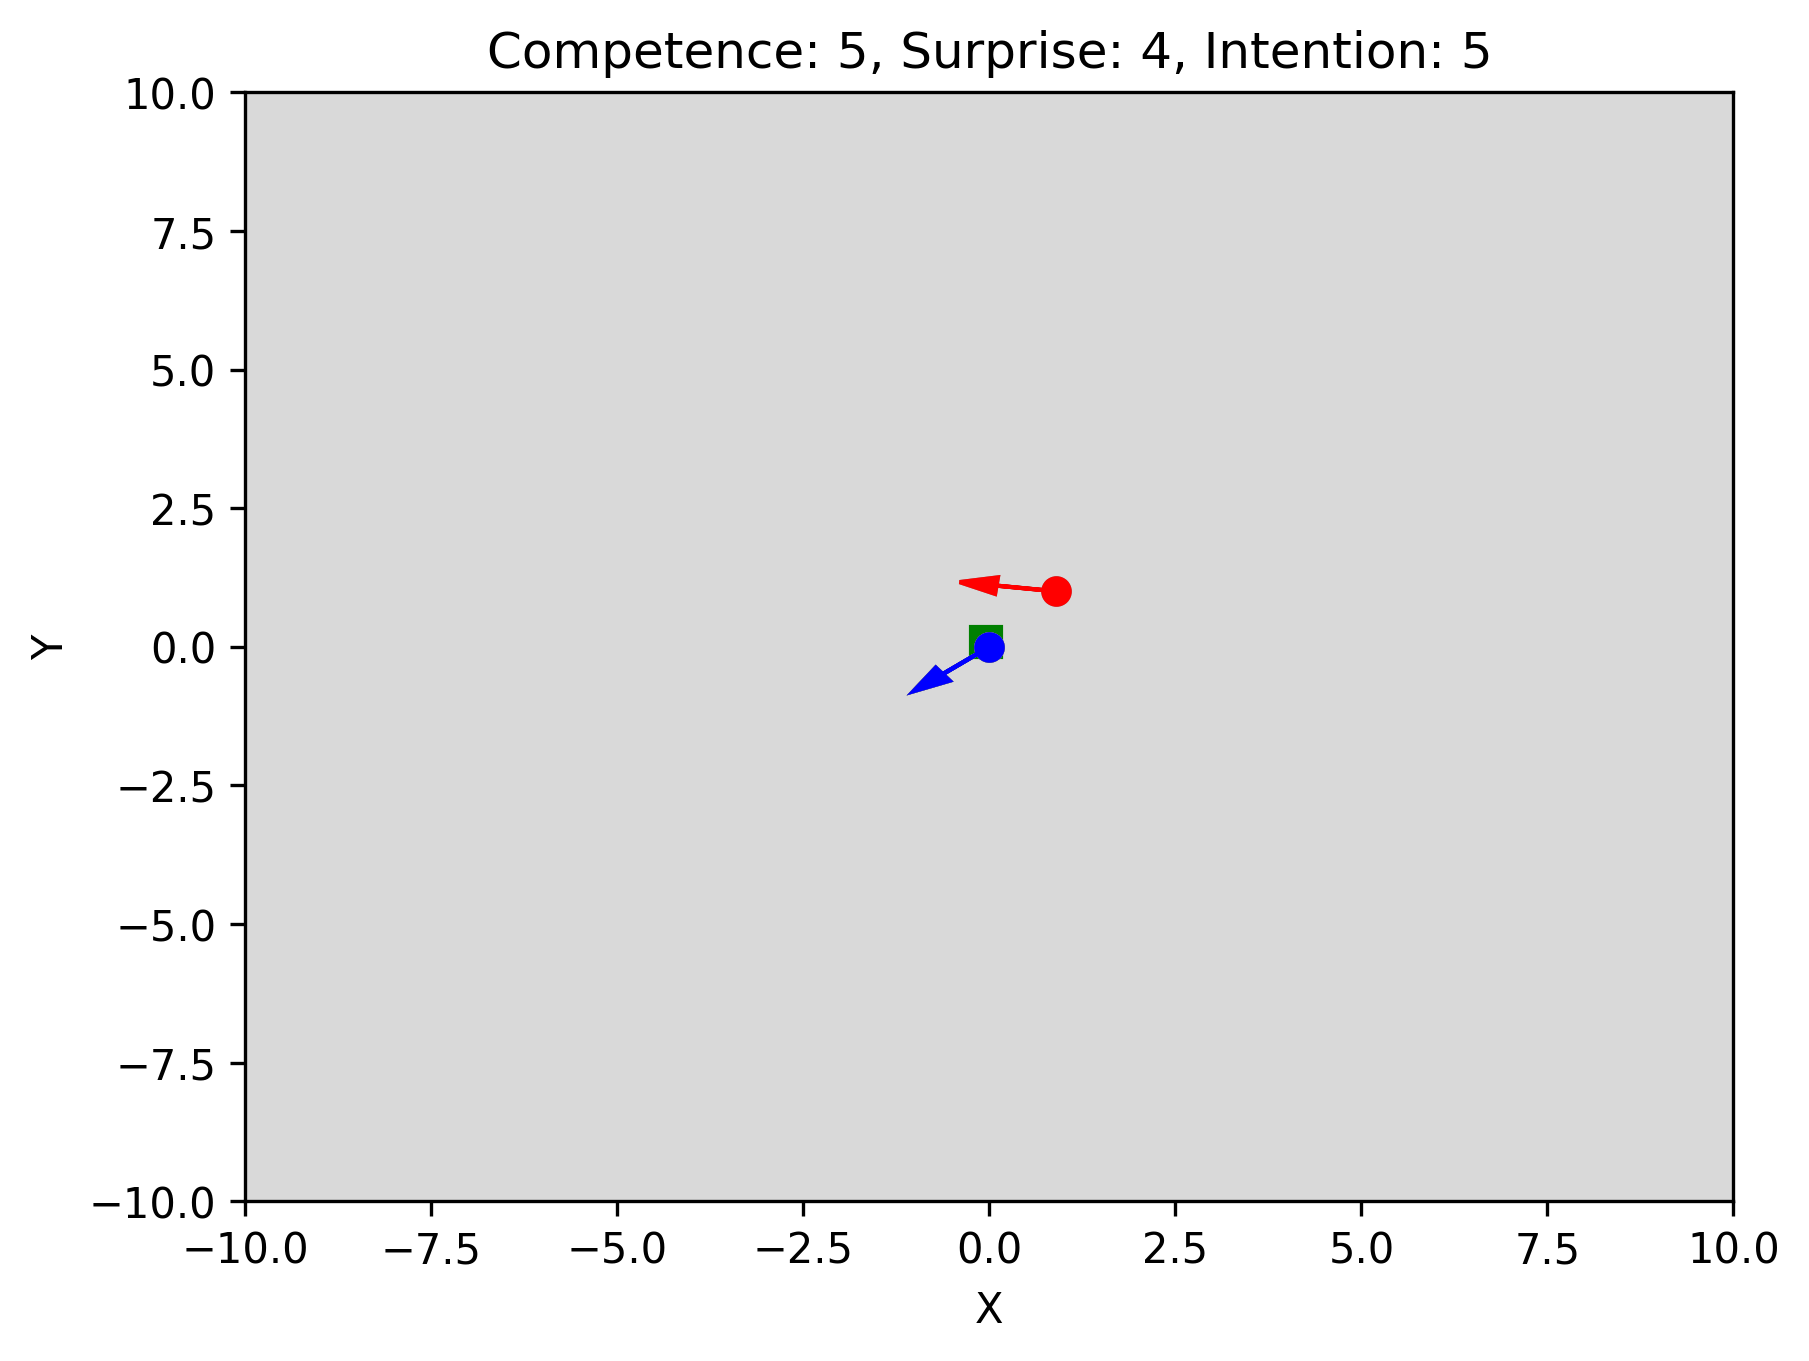

In [24]:
ex = 1
numEx = 3
img_path = str(id_I_c2b[ex])
case = "2b"; # One of 1,2,3,(4) + a/b

###########################################################################################################

# Do not touch the code below !!
img_path_split = img_path.split("/")
participant = img_path_split[3]
bag = img_path_split[5][:-4]

img = 'viz_RQ1/' + participant + '/' + bag + '/spacial_map/spacial_map_'

for i in range(40): 
    clear_output(wait=True)
    display(Image(img+str(i)+".png", width = 600))
    display(HTML(f"<h4 style='text-align: left;'>{'Image: spacial_map_' + str(i)}</h4>"))
    display(HTML(f"<h4 style='text-align: left;'>{'Case ' + case}</h4>"))
    display(HTML(f"<h4 style='text-align: left;'>{'Example ' + str(ex) + ' of ' + str(numEx-1)}</h4>"))
    time.sleep(0.05)